# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [492]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

### Load the Dataset

In [503]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


# Use the connection to extract SQL data
life_expectancy = pd.read_sql_query('SELECT * FROM lifeexpectancy', con=engine)

# Close the connection
engine.dispose()

### Detect problems, such as missing values and outliers.

In [494]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [504]:
#Remove extra whitespace from column names
life_expectancy.columns = [item.replace('  ', ' ').strip() for item in list(life_expectancy.columns)]
headers = list(life_expectancy.columns)

In [496]:
#Datatypes for each variable
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

The datatypes for each respective variable make sense, in that the only two that are objects are 'Country' and 'Status,' which are the only two variables containing non-numeric string entries.

In [497]:
#Descriptive stats:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [498]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [505]:
#Check if any values are NaN and need to be fixed
print(life_expectancy.isnull().sum()/life_expectancy.isnull().count())

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness 1-19 years                0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64


### Original Levels of Correlation

In [501]:
#Determine highest correlations to 'Life expectancy'
life_expectancy.corr()['Life expectancy'].sort_values()

Adult Mortality                   -0.696359
HIV/AIDS                          -0.556556
thinness 1-19 years               -0.477183
thinness 5-9 years                -0.471584
under-five deaths                 -0.222529
infant deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
BMI                                0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

According to the above correlation matrix, the variables with the strongest correlations to 'Life expectancy' are: 'Adult Mortality' (negative), 'HIV/AIDS' (negative), 'BMI' (positive), 'Income composition of resources' (positive), and 'Schooling' (positive). Positive correlations mean that life expectancy goes up when the variable value goes up, while negative correlations mean that life expectancy goes up when the variable value goes down, and vice-versa.

### Remove Non-Sensical Values

In [506]:
# 'infant deaths', 'percentage expenditure', 'Measles','under-five deaths', 'HIV/AIDS', and 'GDP' seem to have the most outliers,
# but all of the columns have some outliers to deal with. 

#Some outliers exceed maximum ranges, so those need to be addressed, and others should be transformed

#Variables that must have values between 0 and 1,000:
    #'Adult Mortality', 'infant deaths', 'Measles', 'under-five deaths', 'HIV/AIDS'
    
#Variables that must have values between 0 and 100 (%):
    #'percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years'
    
#Variables that must have a value between 0 and 1:
    #'Income composition of resources'
    
    
#If any value higher than maximum or lower than minimum, replace with the maximum/minimum, respectively.

for column in ['Adult Mortality', 'infant deaths', 'Measles', 'under-five deaths', 'HIV/AIDS']:
    for i in range(len(life_expectancy[column])):
        if (life_expectancy[column][i] < 0):
            life_expectancy[column][i] = 0
        elif (life_expectancy[column][i] > 1000):
            life_expectancy[column][i] = 1000
            
for column in ['percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness 1-19 years', 'thinness 5-9 years']:
    for i in range(len(life_expectancy[column])):
        if (life_expectancy[column][i] < 0):
            life_expectancy[column][i] = 0
        elif (life_expectancy[column][i] > 100):
            life_expectancy[column][i] = 100 
            
for i in range(len(life_expectancy['Income composition of resources'])):
    if (life_expectancy['Income composition of resources'][i] < 0):
        life_expectancy['Income composition of resources'][i] = 0
    elif (life_expectancy['Income composition of resources'][i] > 1):
        life_expectancy['Income composition of resources'][i] = 1

### Missing Values (NaNs) - Fill Options
Because this datset is ordered by both country and year, we need to figure out if interpolation is possible, and if it is, which variable should be used for the interpolation grouping.

In [507]:
#Check if we chould interpolate by country
unique_country = list(life_expectancy['Country'].unique())
#Remove extra whitespace from country names
unique_country = [item.replace('  ', ' ').strip() for item in unique_country]


#Check if any countries have columns that contain only NaNs
fill_cols = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
num_country = 0

for country in unique_countries:
    tracker = True
    for col in fill_cols:
        if len(life_expectancy[col][life_expectancy['Country']==country].dropna())==0:
            if tracker == True:
                print('\n')
                print(country, ': ')
                num_country = num_country + 1
                tracker=False
            if tracker == False:
                print('\t', col)

print('\n\nWithin this dataset, %d countries out of a total of %d have at least one column of data containing only NaN values.' % (num_country, len(unique_country)))



Côte d'Ivoire : 
	 GDP
	 Population
	 Income composition of resources
	 Schooling


Antigua and Barbuda : 
	 Population


Bahamas : 
	 GDP
	 Population


Bahrain : 
	 Population


Barbados : 
	 Population


Bolivia (Plurinational State of) : 
	 GDP
	 Population


Brunei Darussalam : 
	 Population


Congo : 
	 GDP
	 Population


Cuba : 
	 Population


Czechia : 
	 GDP
	 Population
	 Income composition of resources
	 Schooling


Democratic People's Republic of Korea : 
	 Total expenditure
	 GDP
	 Population
	 Income composition of resources
	 Schooling


Democratic Republic of the Congo : 
	 GDP
	 Population
	 Income composition of resources
	 Schooling


Denmark : 
	 Hepatitis B


Egypt : 
	 GDP
	 Population


Slovakia : 
	 GDP
	 Population


Finland : 
	 Hepatitis B


Gambia : 
	 GDP
	 Population


Grenada : 
	 Population


Hungary : 
	 Hepatitis B


Iceland : 
	 Hepatitis B


Iran (Islamic Republic of) : 
	 GDP
	 Population


Japan : 
	 Hepatitis B


Kuwait : 
	 Population


Kyrgyzs

In [508]:
#Check if we should interpolate by year
unique_year = list(life_expectancy['Year'].unique())

#Check if any years have columns that contain only NaNs
fill_cols = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
num_year = 0

for year in unique_year:
    tracker = True
    for col in fill_cols:
        if len(life_expectancy[col][life_expectancy['Year']==year].dropna())==0:
            if tracker == True:
                print('\n')
                print(year, ': ')
                num_year = num_year + 1
                tracker=False
            if tracker == False:
                print('\t', col)

print('\nWithin this dataset, %d years out of a total of %d have at least one column of data containing only NaN values.' % (num_year, len(unique_year)))


Within this dataset, 0 years out of a total of 16 have at least one column of data containing only NaN values.


In [509]:
#Therefore, the NaNs should be filled by interpolation by year.
fill_cols = list(life_expectancy.columns.drop(['Country', 'Status', 'Year']))
unique_years = life_expectancy['Year'].unique()

for year in unique_years:
    life_expectancy.loc[life_expectancy['Year'] == year, fill_cols] = life_expectancy.loc[life_expectancy['Year'] == year, fill_cols].interpolate()
    
#Percentage of remaining missing values per category:
life_expectancy.isnull().sum()/life_expectancy.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness 1-19 years                0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

Alternatively, we could have filled the missing values with the mean or median of the column, but that may have led to lower accuracy and might introduce more skew to the distribution.

### Detect Outliers - Boxplots

<Figure size 1080x504 with 0 Axes>

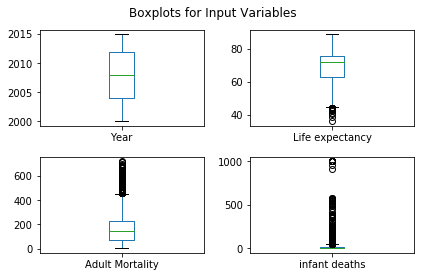

<Figure size 1080x504 with 0 Axes>

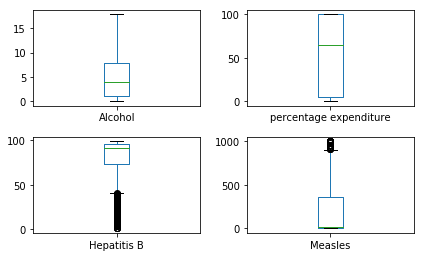

<Figure size 1080x504 with 0 Axes>

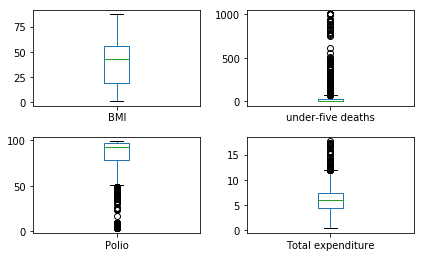

<Figure size 1080x504 with 0 Axes>

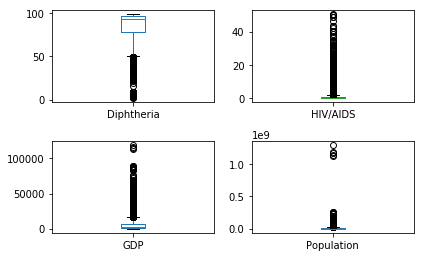

<Figure size 1080x504 with 0 Axes>

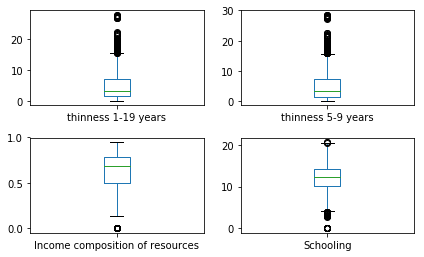

In [510]:
plt.figure(figsize=(15,7))
life_expectancy[[headers[1], headers[3], headers[4], headers[5]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.suptitle('Boxplots for Input Variables\n', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[6], headers[7], headers[8], headers[9]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[10], headers[11], headers[12], headers[13]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[14], headers[15], headers[16], headers[17]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[18], headers[19], headers[20], headers[21]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Determine Extent of Outliers - Tukey's Method

In [511]:
#Determine parameters of outlier removal using Tukey's method
outlier_loc = []
top_outlier_percent = []
bottom_outlier_percent = []

for col in list(life_expectancy.columns.drop(['Country', 'Status'])):
    q75, q25 = np.percentile(life_expectancy[col], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    if (len((np.where(life_expectancy[col] > max_val))[0]) > 0):
        if (len((np.where(life_expectancy[col] < min_val))[0]) > 0):
            loc_now = 'both ends'
        else:
            loc_now = 'top'
    else:
        loc_now = 'bottom'
    
    outlier_loc.append(loc_now)
    print("Percentage of outliers in {}, located at {} of range: {}".format(col, loc_now, len((np.where((life_expectancy[col] > max_val) |(life_expectancy[col] < min_val))[0]))/len(life_expectancy)))
    
    top_percent = len((np.where((life_expectancy[col] > max_val))[0]))/len(life_expectancy)
    #Get values to the closest whole percent
    top_outlier_percent.append(math.ceil(top_percent*100)/100)
    
    bottom_percent = len((np.where((life_expectancy[col] < min_val))[0]))/len(life_expectancy)
    #Get values to the closest whole percent
    bottom_outlier_percent.append(math.ceil(bottom_percent*100)/100)

Percentage of outliers in Year, located at bottom of range: 0.0
Percentage of outliers in Life expectancy, located at bottom of range: 0.005786249149081007
Percentage of outliers in Adult Mortality, located at top of range: 0.029271613342409804
Percentage of outliers in infant deaths, located at top of range: 0.10721579305650102
Percentage of outliers in Alcohol, located at bottom of range: 0.0
Percentage of outliers in percentage expenditure, located at bottom of range: 0.0
Percentage of outliers in Hepatitis B, located at bottom of range: 0.095643294758339
Percentage of outliers in Measles, located at top of range: 0.18447923757658272
Percentage of outliers in BMI, located at bottom of range: 0.0
Percentage of outliers in under-five deaths, located at top of range: 0.13410483321987746
Percentage of outliers in Polio, located at bottom of range: 0.09496255956432947
Percentage of outliers in Total expenditure, located at top of range: 0.014295439074200136
Percentage of outliers in Diph

In [512]:
#Show calculated outlier parameters to be used for winsorization
df = pd.DataFrame()

df['variable name'] = list(life_expectancy.columns.drop(['Country', 'Status']))
df['top outliers'] = top_outlier_percent
df['bottom outliers'] = bottom_outlier_percent
df['outlier location'] = outlier_loc

df

,variable name,top outliers,bottom outliers,outlier location
0,Year,0.00,0.00,bottom
1,Life expectancy,0.00,0.01,bottom
2,Adult Mortality,0.03,0.00,top
3,infant deaths,0.11,0.00,top
4,Alcohol,0.00,0.00,bottom
5,percentage expenditure,0.00,0.00,bottom
6,Hepatitis B,0.00,0.10,bottom
7,Measles,0.19,0.00,top
8,BMI,0.00,0.00,bottom
9,under-five deaths,0.14,0.00,top


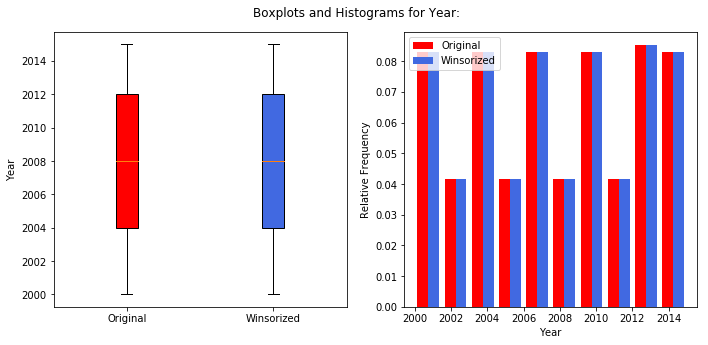

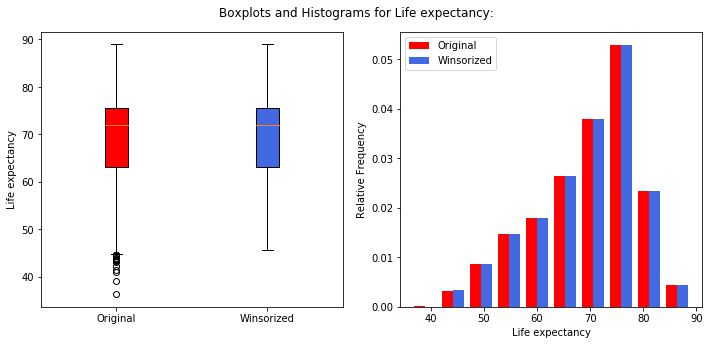

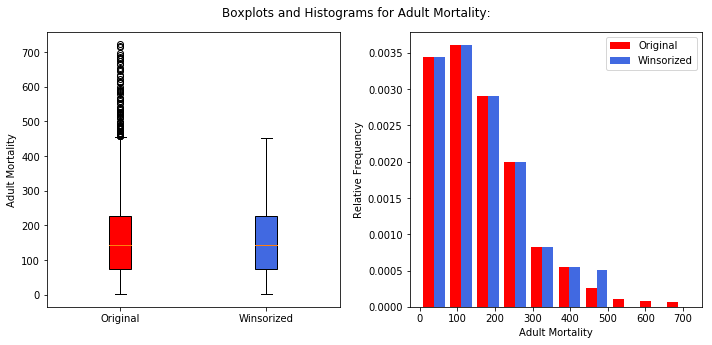

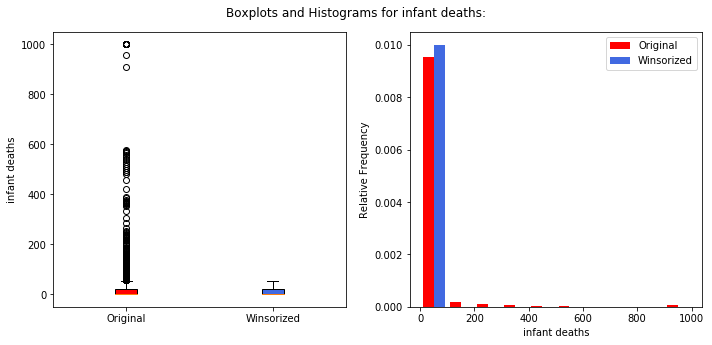

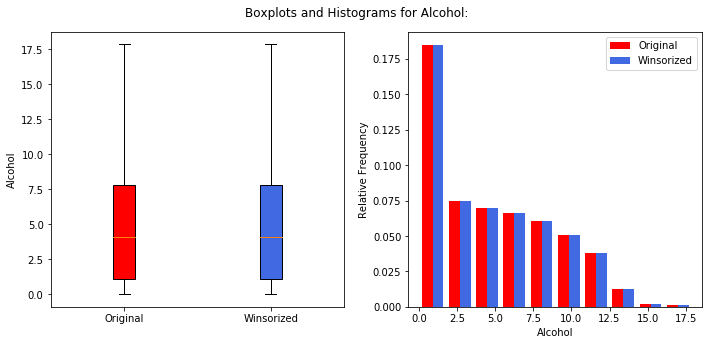

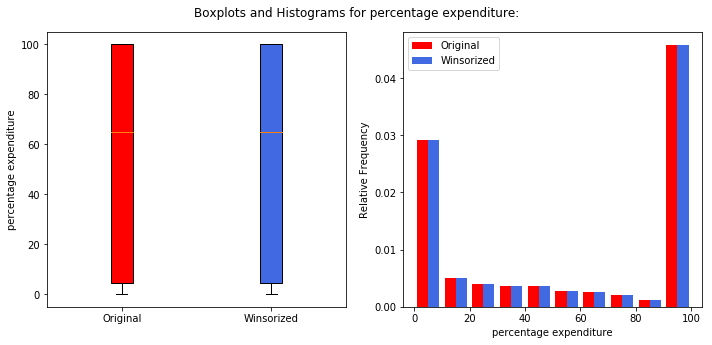

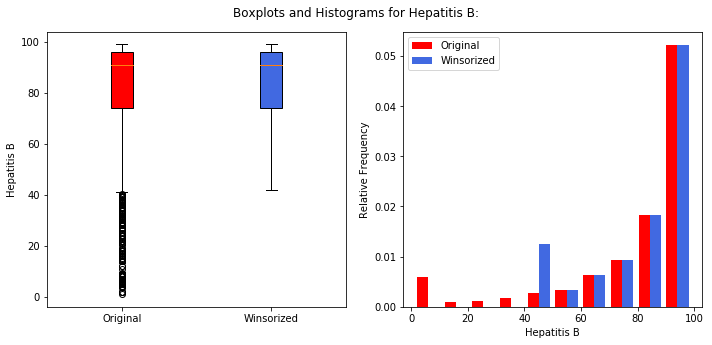

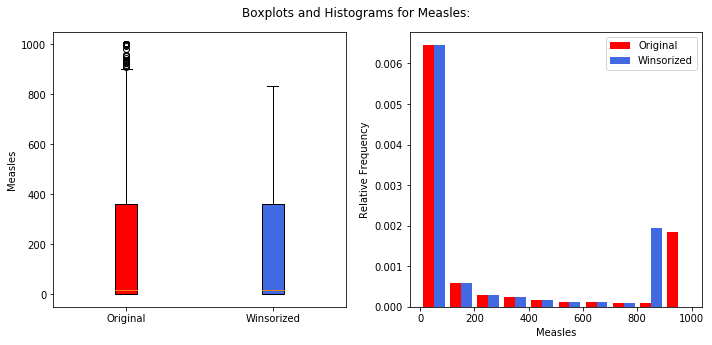

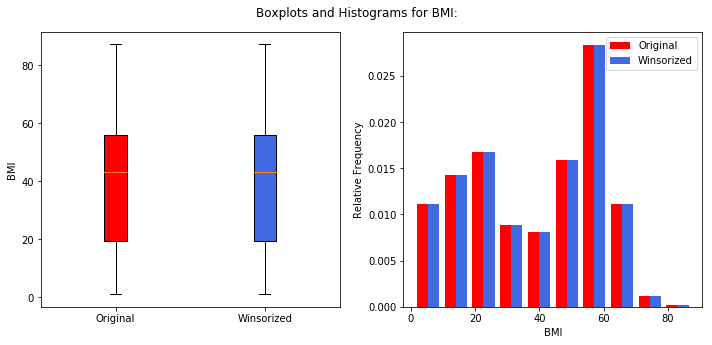

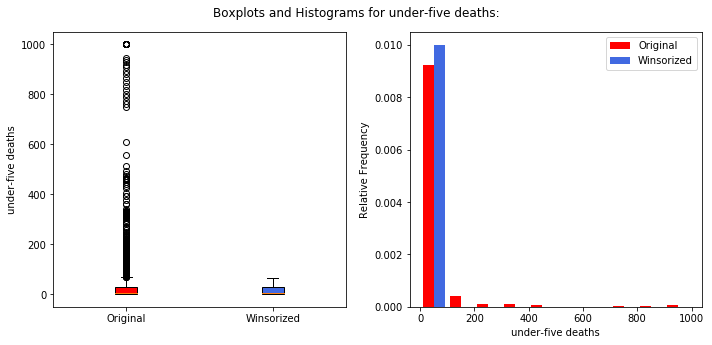

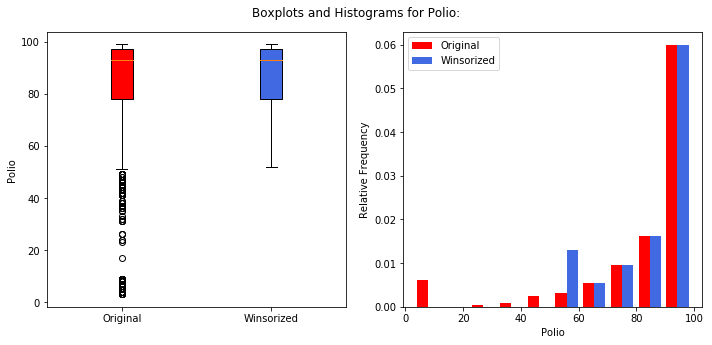

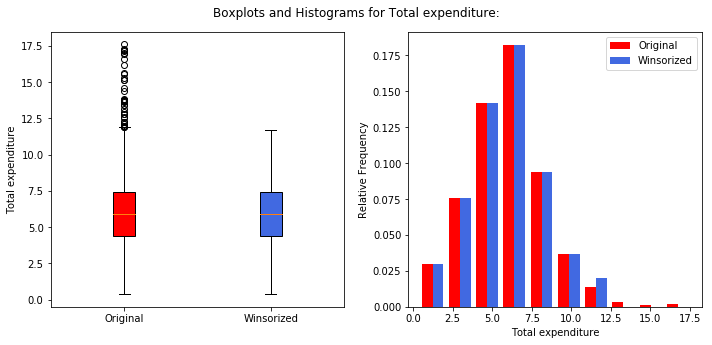

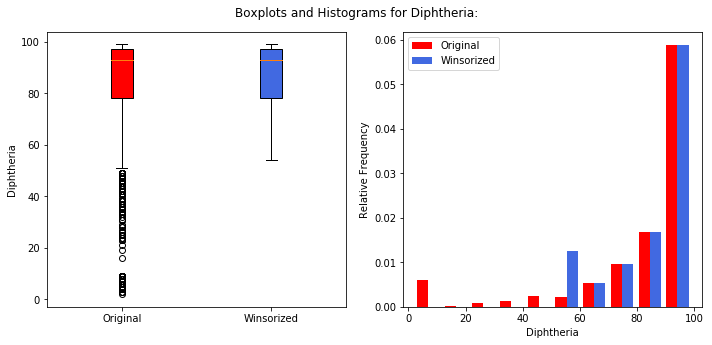

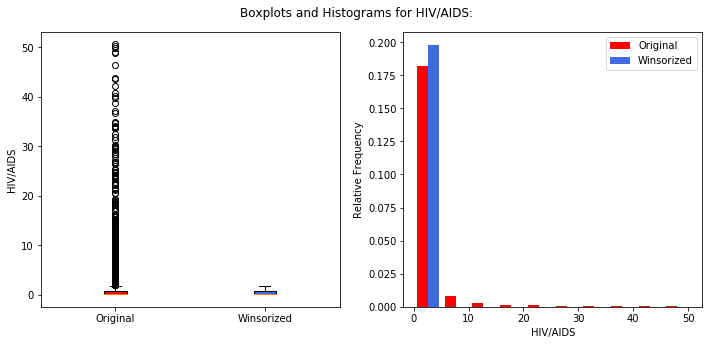

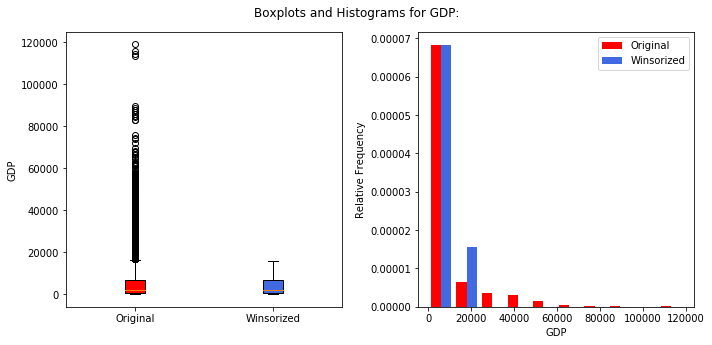

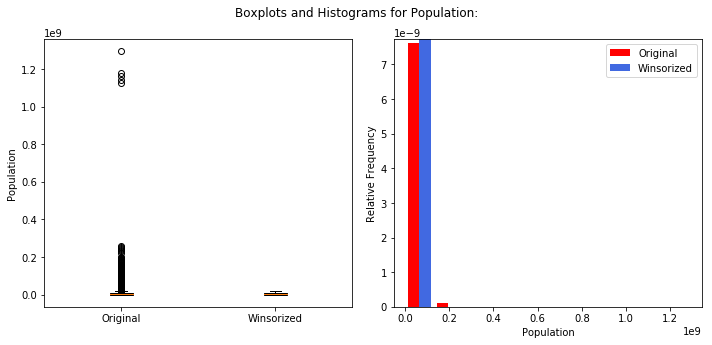

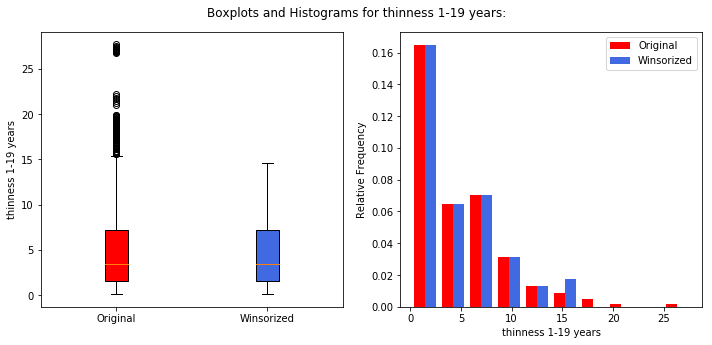

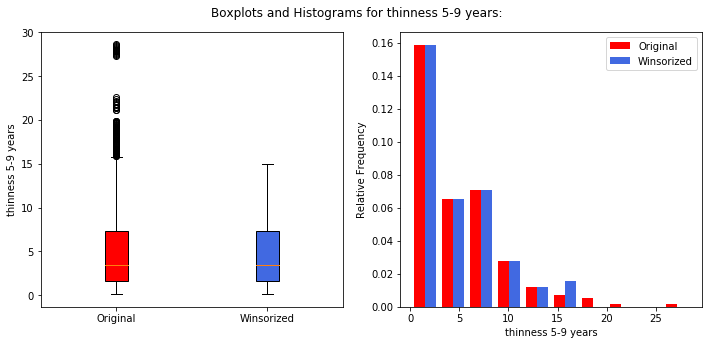

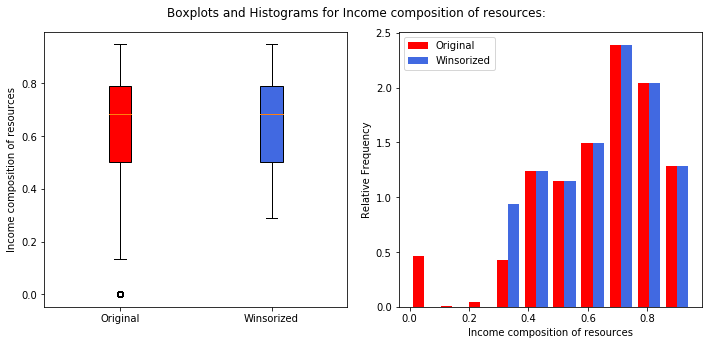

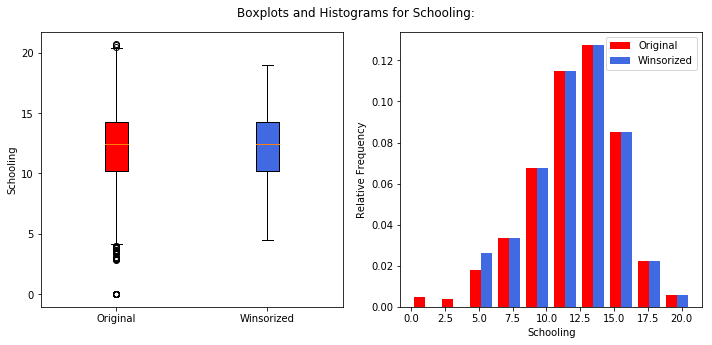

In [513]:
#Transform/remove the outliers, using winsorize()
from scipy.stats.mstats import winsorize

winsorized_cols = pd.DataFrame()

cols = life_expectancy.columns.drop(['Country', 'Status'])
for i in range(len(cols)):
    winsorized_cols[cols[i]] = winsorize(life_expectancy[cols[i]], (bottom_outlier_percent[i], top_outlier_percent[i]))

    
#Analyze the effects of winsorization on boxplots/histograms:
for col in cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    box = plt.boxplot([life_expectancy[col], winsorized_cols[col]], patch_artist = True, labels = ['Original', 'Winsorized'])
    plt.ylabel(col)
    
    colors = ['red', 'royalblue']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.subplot(1,2,2)
    plt.hist([life_expectancy[col], winsorized_cols[col]], color=colors, label = ['Original', 'Winsorized'], normed=True)
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.legend()
    
    
    plt.suptitle('Boxplots and Histograms for ' + col + ':')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

In [514]:
#Now that the outliers and missing values have mostly been fixed, we can perform analysis on the cleaned dataset
expectancy2 = winsorized_cols.copy()
expectancy2.columns = [str('Winsorized ' + item) for item in list(expectancy2.columns)]

expectancy2['Country'] = list(life_expectancy['Country'])
expectancy2['Status'] = list(life_expectancy['Status'])

#Description of winsorized dataframe statistics
expectancy2.describe()

,Winsorized Year,Winsorized Life expectancy,Winsorized Adult Mortality,Winsorized infant deaths,Winsorized Alcohol,Winsorized percentage expenditure,Winsorized Hepatitis B,Winsorized Measles,Winsorized BMI,Winsorized under-five deaths,Winsorized Polio,Winsorized Total expenditure,Winsorized Diphtheria,Winsorized HIV/AIDS,Winsorized GDP,Winsorized Population,Winsorized thinness 1-19 years,Winsorized thinness 5-9 years,Winsorized Income composition of resources,Winsorized Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.242410,161.945711,13.635126,4.734205,56.461883,82.200675,220.691287,38.355071,17.417971,85.539142,5.919408,85.723281,0.508237,4784.687182,4.710310e+06,4.700425,4.729595,0.647716,12.123758
std,4.613841,9.462106,115.200636,19.108928,3.983278,43.852859,18.390667,329.192321,19.967676,24.075262,15.298077,2.292885,14.773371,0.640847,5540.975048,6.003257e+06,3.875410,3.934560,0.176059,3.148119
min,2000.000000,45.600000,1.000000,0.000000,0.010000,0.000000,42.000000,0.000000,1.000000,0.000000,52.000000,0.370000,54.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.290000,4.500000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,544.023758,2.896760e+05,1.600000,1.600000,0.501000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,4.070000,64.912906,91.000000,17.000000,43.300000,4.000000,93.000000,5.920000,93.000000,0.100000,2244.484692,1.546718e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,227.000000,22.000000,7.809674,100.000000,96.000000,360.250000,56.100000,28.000000,97.000000,7.390000,97.000000,0.800000,6950.921162,7.289765e+06,7.200000,7.300000,0.788000,14.300000
max,2015.000000,89.000000,452.000000,55.000000,17.870000,100.000000,99.000000,831.000000,87.300000,66.000000,99.000000,11.660000,99.000000,1.700000,15669.259290,1.699558e+07,14.600000,15.000000,0.948000,19.000000


In [515]:
#Determine highest correlations to 'Life expectancy'
expectancy2.corr()['Winsorized Life expectancy'].sort_values()

Winsorized HIV/AIDS                          -0.796776
Winsorized Adult Mortality                   -0.690669
Winsorized under-five deaths                 -0.606020
Winsorized infant deaths                     -0.566809
Winsorized thinness 1-19 years               -0.524769
Winsorized thinness 5-9 years                -0.522109
Winsorized Measles                           -0.337435
Winsorized Population                        -0.033367
Winsorized Year                               0.168995
Winsorized Total expenditure                  0.203430
Winsorized Hepatitis B                        0.251873
Winsorized percentage expenditure             0.356106
Winsorized Alcohol                            0.382869
Winsorized GDP                                0.480259
Winsorized BMI                                0.556721
Winsorized Polio                              0.573998
Winsorized Diphtheria                         0.582178
Winsorized Schooling                          0.737636
Winsorized

According to the above correlations list, the variables with the strongest correlations to 'Life expectancy' are: 'HIV/AIDS' (negative), 'Adult Mortality' (negative), 'under-five deaths' (negative), 'thinness 1-19 years' (negative), 'thinness 5-9 years' (negative),  'BMI' (positive), 'Polio' (Positive), 'Diphtheria' (Positive), 'Schooling' (positive), and 'Income composition of resources' (positive). Positive correlations mean that life expectancy goes up when the variable value goes up, while negative correlations mean that life expectancy goes up when the variable value goes down, and vice-versa.

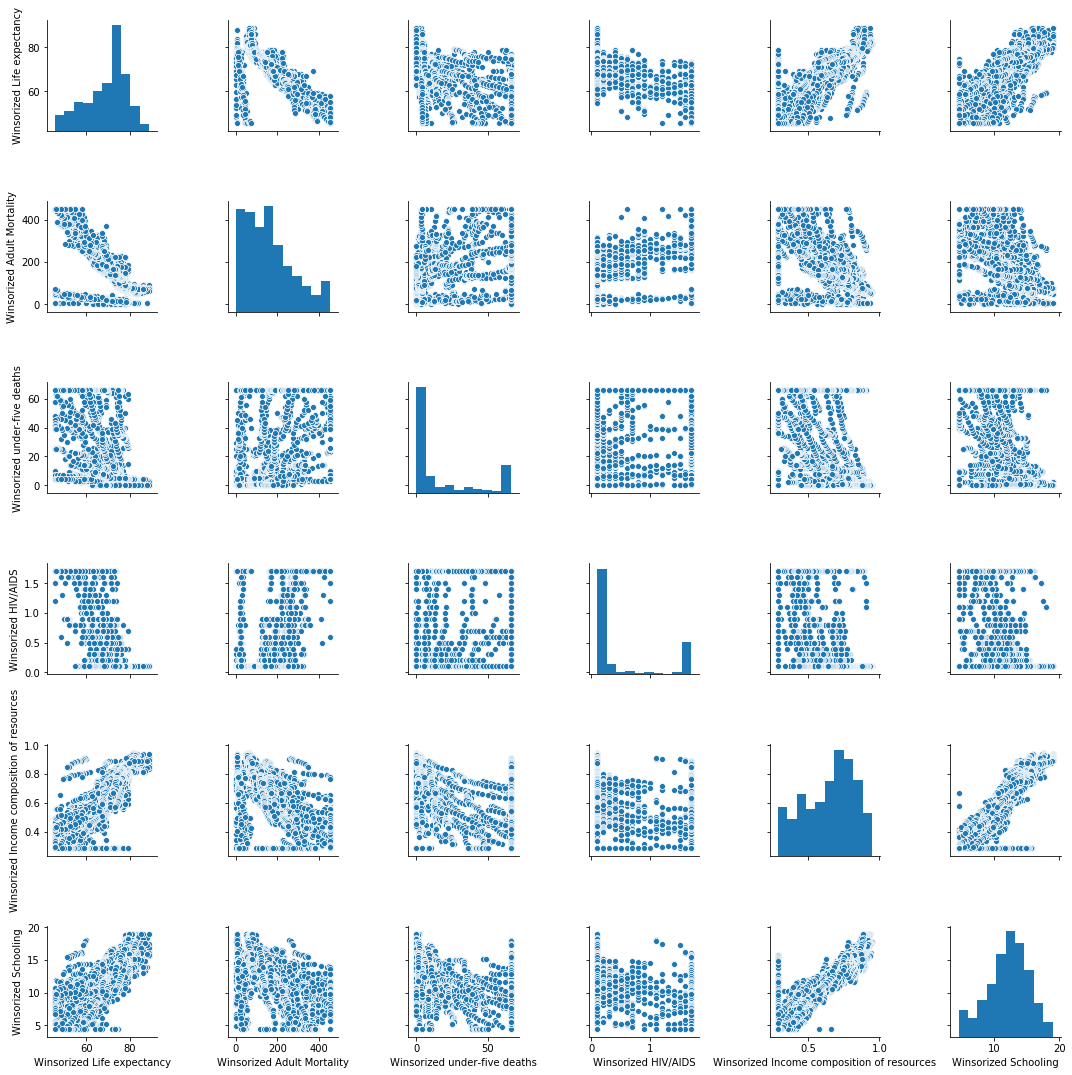

In [516]:
headers2 = list(expectancy2.columns)

#Scatter Matrix of highly correlated variables
pp_cols = [headers2[i] for i in list(np.where(abs(expectancy2.corr()['Winsorized Life expectancy'])>0.6)[0])]
sns.pairplot(expectancy2[pp_cols])
plt.show()

In [578]:
# Function to create a scatter plot with a trendline
def trendScat(data, y_var,y_str,y_units,x_var,x_str, unique):
    df_counts = data.groupby([x_var, y_var]).size().reset_index(name='counts')
    plt.scatter(df_counts[x_var], df_counts[y_var], s=df_counts.counts*20, color='blue')

    plt.xlabel('\n'+ x_str)
    plt.ylabel(y_str + ' ' + y_units + '\n')

    unique = [x for x in unique if ~np.isnan(x)]    

    #Average all y_var per unique x_var
    averaged = []
    for i in range(len(unique)):
        if (unique[1] - unique[0] > 100):
            meanlist = data[y_var][(round((data[x_var]/1000),2)*1000) == unique[i]]
        elif (unique[1] - unique[0] > 1000):
            meanlist = data[y_var][(round((data[x_var]/10000),2)*10000) == unique[i]]
        else:
            meanlist = data[y_var][round(data[x_var],2) == unique[i]].append(data[y_var][round(data[x_var],1) == unique[i]].append(data[y_var][round(data[x_var],0) == unique[i]]))
        averaged.append(np.nanmean(meanlist))

    #Remove Nans from both arrays
    df = pd.DataFrame()
    df['averaged'] = averaged
    df['unique'] = unique
    df = df.dropna()
    
    unique = np.array(df.unique)
    averaged = np.array(df.averaged)

    # calculate polynomial
    z = np.polyfit(unique, averaged, 2)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(unique[0], unique[-1], 2)
    y_new = f(x_new)
            
    plt.plot(x_new, y_new, color = 'red', label = 'Averaged Trendline')
    plt.show()

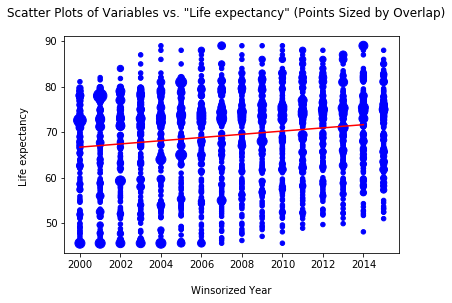

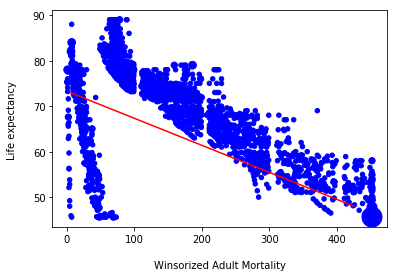

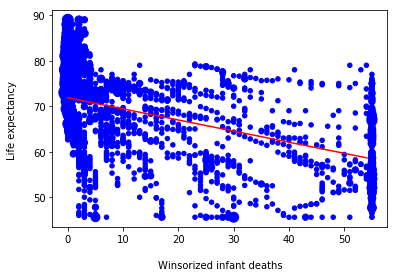

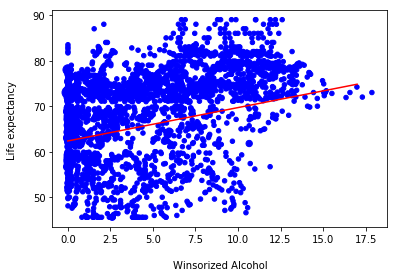

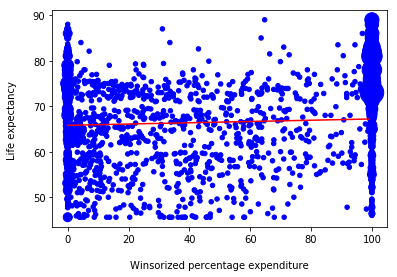

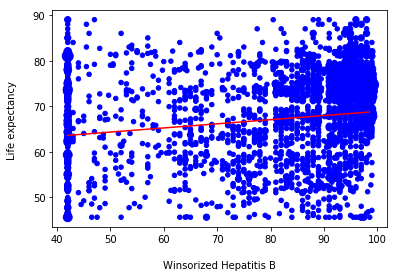

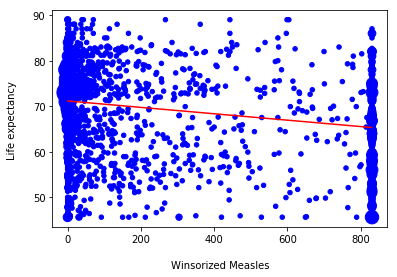

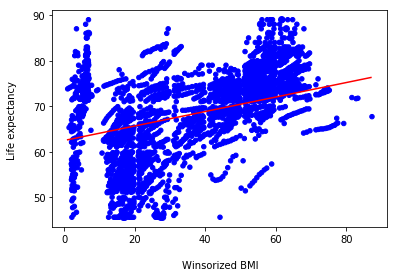

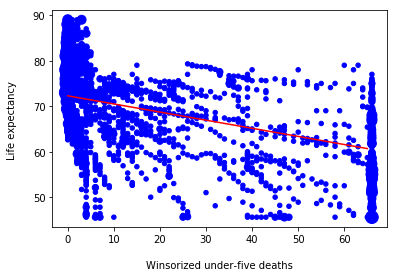

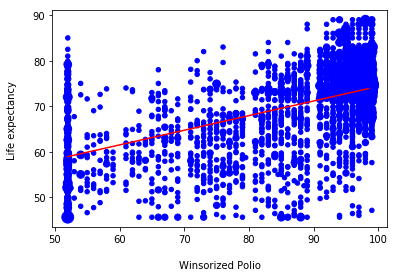

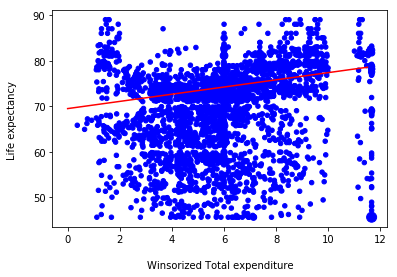

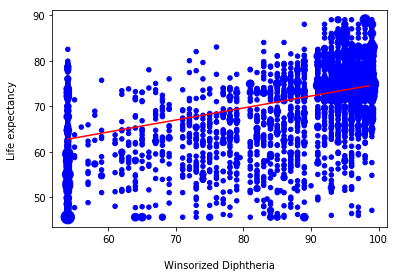

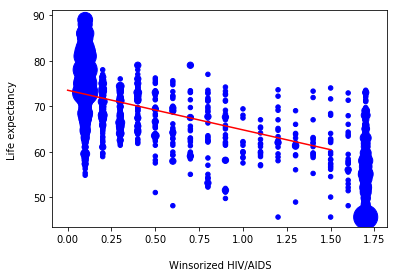

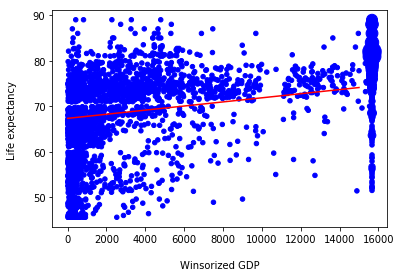

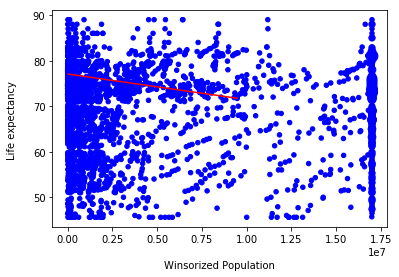

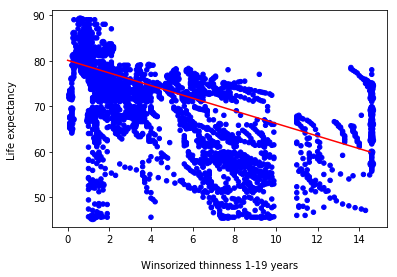

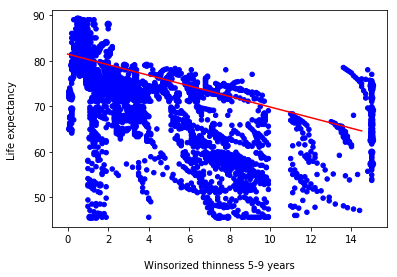

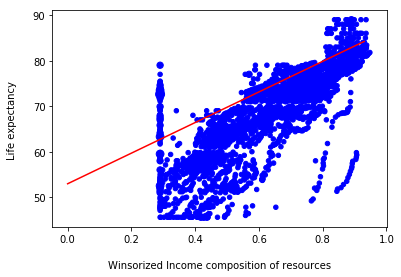

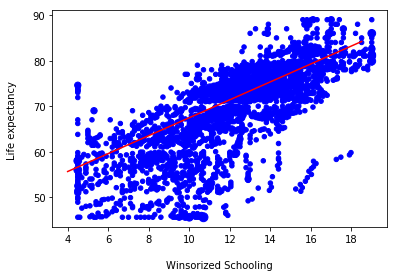

In [579]:
#Deeper exploration the variables and their correlations to our variable of interest
y_var = 'Winsorized Life expectancy'

plt.suptitle('Scatter Plots of Variables vs. "Life expectancy" (Points Sized by Overlap)')    
for col in [x for x in headers2 if x not in ['Country', 'Status']]:
    if col != y_var:
        if col == 'Winsorized Year':
            unique_initial = list(np.arange(math.floor(min(expectancy2[col])), math.ceil(max(expectancy2[col])),1))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))<=1):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),0.01))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))<=100):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),0.5))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))<=1000):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),5))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))<=10000):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),100))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))>10000):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),1000))   #Range of all potential values on x axis
        elif (math.ceil(max(expectancy2[col]))>100000):
            unique_initial = list(np.arange(0, math.ceil(max(expectancy2[col])),10000))   #Range of all potential values on x axis
                
        trendScat(expectancy2, y_var,'Life expectancy', '', col, col, unique = unique_initial)


In these scatterplots, we see that the only areas in which the points begin to show signs of overlap (i.e. larger marker size) are the edges and corners of some of the plots. This is likely due to some inherent issue with the data collection process or something to do with how outliers and missing values were dealt with. However, even with the outlines and corners making some of the plots look strange, we can still clearly see that several variables have a linear relationship with 'Life expectancy', namely: 'Adult Mortality' (Negative), 'infant deaths' (Negative), 'BMI' (Positive), 'under-five deaths' (Negative), 'Polio' (Positive), 'Diphtheria' (Positive), 'HIV/AIDS' (Negative), 'GDP' (Positive), both 'thinness' variables (Negative), 'Income composition of resources' (Positive), and 'Schooling' (Positive). The other variables can be discarded to simplify the analysis.

In [580]:
#Feature engineering: create dummies for string categorical variables
unique_status = list(expectancy2['Status'].unique())
unique_country = list(expectancy2['Country'].unique())

#Convert string categorical variables to numerical dummies
dummy_status = []
for row in expectancy2['Status']:
    for i in range(len(unique_status)):
        if row == unique_status[i]:
            dummy_status.append(i)
        
expectancy2['Dummy Status'] = dummy_status


dummy_country = []
for row in expectancy2['Country']:
    for i in range(len(unique_country)):
        if row == unique_country[i]:
            dummy_country.append(i)
        
expectancy2['Dummy Country'] = dummy_country

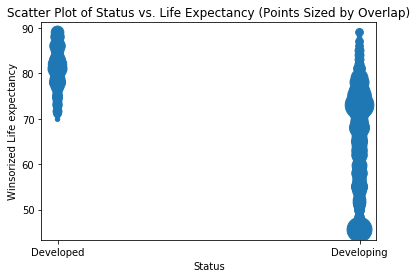

Correlation Between Status and Life Expectancy: 
0.48343294841863255


Ttest_indResult(statistic=29.923814970736473, pvalue=5.949928340797476e-172)




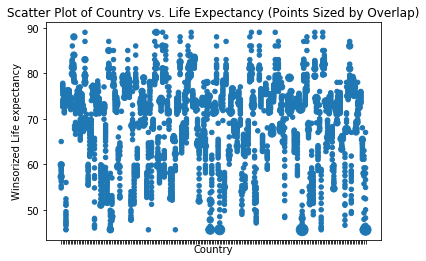

Correlation Between Country and Life Expectancy: 
-0.013057721506204028


In [582]:
pp_counts = expectancy2.groupby(['Status', 'Winsorized Life expectancy']).size().reset_index(name='counts')
plt.scatter(pp_counts['Status'], pp_counts['Winsorized Life expectancy'], s=pp_counts.counts*20)
plt.ylabel('Winsorized Life expectancy')
plt.xlabel('Status')
plt.title('Scatter Plot of Status vs. Life Expectancy (Points Sized by Overlap)')
plt.show()

print('Correlation Between Status and Life Expectancy: ')
print(expectancy2.corr()['Winsorized Life expectancy'].sort_values()['Dummy Status'])

# t-test
import scipy.stats as stats
print('\n')
print(stats.ttest_ind(expectancy2.loc[expectancy2['Status']=='Developed','Winsorized Life expectancy'],expectancy2.loc[expectancy2['Status']=='Developing','Winsorized Life expectancy']))
print('\n')

pp_counts = expectancy2.groupby(['Country', 'Winsorized Life expectancy']).size().reset_index(name='counts')
plt.scatter(pp_counts['Country'], pp_counts['Winsorized Life expectancy'], s=pp_counts.counts*20)
plt.ylabel('Winsorized Life expectancy')
plt.xlabel('Country')
plt.tick_params(axis='both', which='both', bottom='on', top='off', labelbottom='off', right='off', left='on', labelleft='on')
plt.title('Scatter Plot of Country vs. Life Expectancy (Points Sized by Overlap)')
plt.show()

print('Correlation Between Country and Life Expectancy: ')
print(expectancy2.corr()['Winsorized Life expectancy'].sort_values()['Dummy Country'])


In [423]:
print('Number of Developed Countries: ')
print(len(np.unique(expectancy2['Country'][expectancy2['Status'] == 'Developed'])))

print('\nNumber of Developing Countries: ')
print(len(np.unique(expectancy2['Country'][expectancy2['Status'] == 'Developing'])))

Number of Developed Countries: 
32

Number of Developing Countries: 
161


The scatter plot of Status versus Life expectancy appears to show that Developed countries tend to have higher life expectancies than Developing countries. The correlation coefficient between Status and Life expectancy is likely so low (~48%) because there is an overabundance of Developing countries in the dataset, compared to Developed ones, so we don't have enough information to draw any definitive conclusion. However, the t-test shows us (via a p-value of much less than 0.05) that there is a statistically significant difference between Developed countries and Developing countries, with respect to Life expectancy. 

The dummy variable for the Country categorical didn't provide useful insight neither in the scatter plot nor in its correlation coefficient. A t-test would be difficult to perform for that categorical variable because it has too many categories to compare easily.

### Correlations Between Other Features
If we can determine that two (or more) features are highly correlated to each other, we can remove the extra one(s), since they provide equivalent information. 

In [606]:
type(expectancy3)


pandas.core.frame.DataFrame

In [640]:
#Drop features that showed low correlation (<40%) to Life expectancy
expectancy3 = expectancy2.copy()
expectancy3 = expectancy3.drop('Country', axis=1)

wincorrs = expectancy3.corr()['Winsorized Life expectancy']

for col in list(wincorrs.index):
    if abs(wincorrs[col]) < 0.4:
        expectancy3 = expectancy3.drop(col, axis=1)

expectancy3.corr()['Winsorized Life expectancy'].sort_values()

Winsorized HIV/AIDS                          -0.796776
Winsorized Adult Mortality                   -0.690669
Winsorized under-five deaths                 -0.606020
Winsorized infant deaths                     -0.566809
Winsorized thinness 1-19 years               -0.524769
Winsorized thinness 5-9 years                -0.522109
Winsorized GDP                                0.480259
Dummy Status                                  0.483433
Winsorized BMI                                0.556721
Winsorized Polio                              0.573998
Winsorized Diphtheria                         0.582178
Winsorized Schooling                          0.737636
Winsorized Income composition of resources    0.789264
Winsorized Life expectancy                    1.000000
Name: Winsorized Life expectancy, dtype: float64

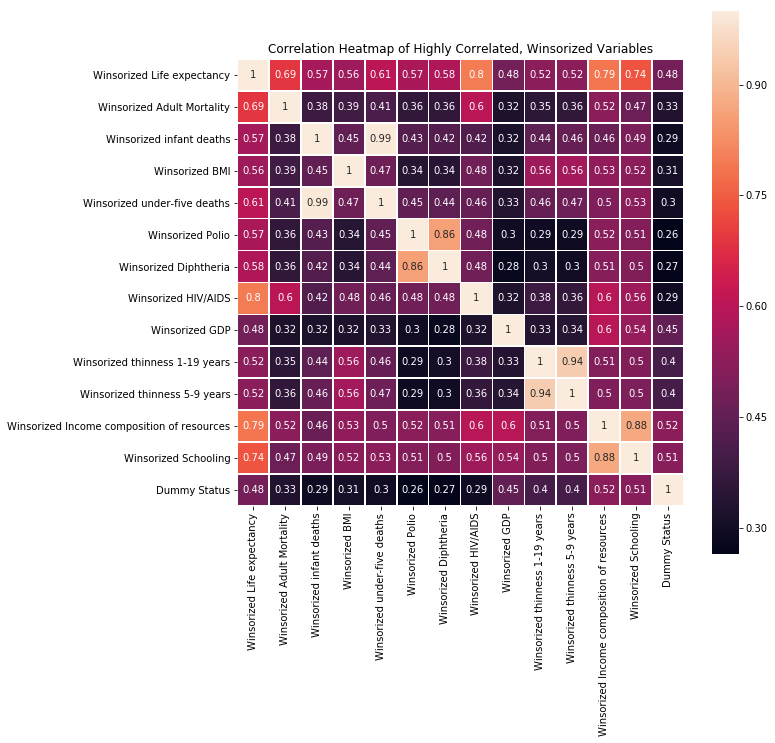

In [641]:
# Similar to the pairplot used previously, a heatmap can help show correlations more quantitatively
plt.figure(figsize=(10,10))
sns.heatmap(abs(expectancy3.corr()), square=True, linewidths=.5, annot=True)
plt.title('Correlation Heatmap of Highly Correlated, Winsorized Variables')
plt.show()


The squares in the heatmap matrix that have the brightest colors indicate the highest levels of correlation. Not counting the correlations to Life expectancy, the highest correlations between independent features in the dataset are:
 - 'under-five deaths' and 'infant deaths'
 - 'Polio' and 'Diphtheria'
 - 'thinness 1-19 years' and 'thinness 5-9 years'
 - 'income composition of resources' and 'Schooling'
 
If we drop one from each pair (the one with the lower correlation to Life expectancy), we can simplify the analysis and improve our model's efficiency.

Note: 'HIV/AIDS' and 'Adult Mortality' have a decently high correlation, but not high enough for me to feel comfortable dropping one of them from the analysis.

### Remove Extraneous Features

In [642]:
set1 = ['Winsorized under-five deaths', 'Winsorized Polio', 'Winsorized thinness 1-19 years', 'Winsorized Income composition of resources']
set2 = ['Winsorized infant deaths', 'Winsorized Diphtheria', 'Winsorized thinness 5-9 years', 'Winsorized Schooling']

for i in range(len(set1)):
    try:
        if expectancy3.corr()['Winsorized Life expectancy'].loc[set1[i]] > expectancy3.corr()['Winsorized Life expectancy'].loc[set2[i]]:
            expectancy3 = expectancy3.drop(set2[i], axis=1)
        else:
            expectancy3 = expectancy3.drop(set1[i], axis=1)
    except:
        next
        
#Show finalized list of correlations to Life expectancy:
expectancy3.corr()['Winsorized Life expectancy'].sort_values()

Winsorized HIV/AIDS                          -0.796776
Winsorized Adult Mortality                   -0.690669
Winsorized infant deaths                     -0.566809
Winsorized thinness 5-9 years                -0.522109
Winsorized GDP                                0.480259
Dummy Status                                  0.483433
Winsorized BMI                                0.556721
Winsorized Diphtheria                         0.582178
Winsorized Income composition of resources    0.789264
Winsorized Life expectancy                    1.000000
Name: Winsorized Life expectancy, dtype: float64

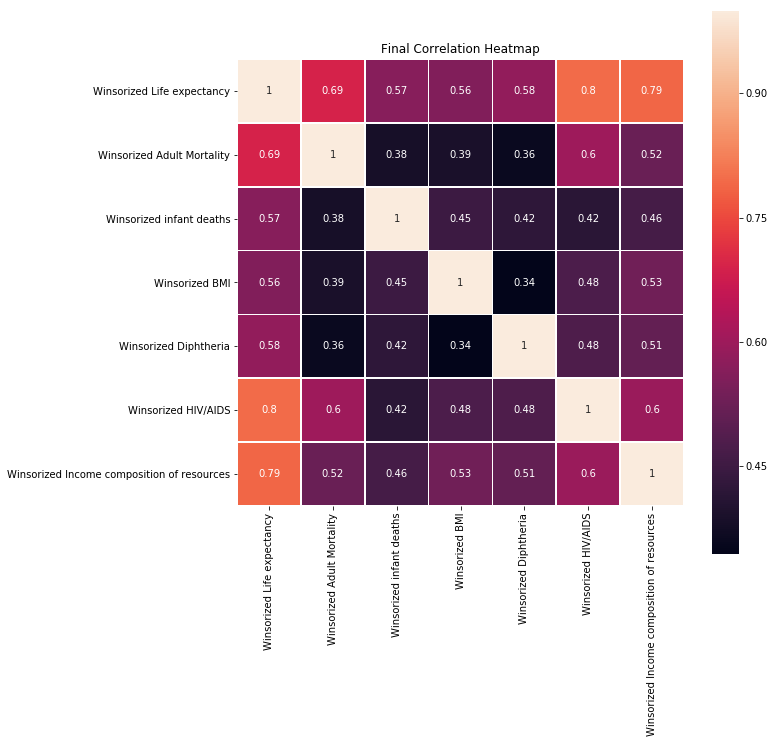

In [643]:
#Finally, we extract out the high correlations (>60%) and show as heatmap
fin_exp = expectancy3.copy()

fin_wincorrs = fin_exp.corr()['Winsorized Life expectancy']

for col in list(fin_wincorrs.index):
    if abs(fin_wincorrs[col]) < 0.55:
        fin_exp = fin_exp.drop(col, axis=1)


plt.figure(figsize=(10,10))
sns.heatmap(abs(fin_exp.corr()), square=True, linewidths=.5, annot=True)
plt.title('Final Correlation Heatmap')
plt.show()

### Addressing Non-Normality
Some machine learning models operate under the assumption that the variables being used are normally distributed. As we have seen in the histograms, this is not the case for this dataset. Although some of the Winsorized histograms ended up looking more or less normal, they weren't perfectly normal, and would therefore negatively impact our model. To address this issue, we have four transformation options: square root, inverse, log, or Box-Cox, as depicted below:

In [644]:
fin_exp.columns

Index(['Winsorized Life expectancy', 'Winsorized Adult Mortality',
       'Winsorized infant deaths', 'Winsorized BMI', 'Winsorized Diphtheria',
       'Winsorized HIV/AIDS', 'Winsorized Income composition of resources',
       'Status'],
      dtype='object')

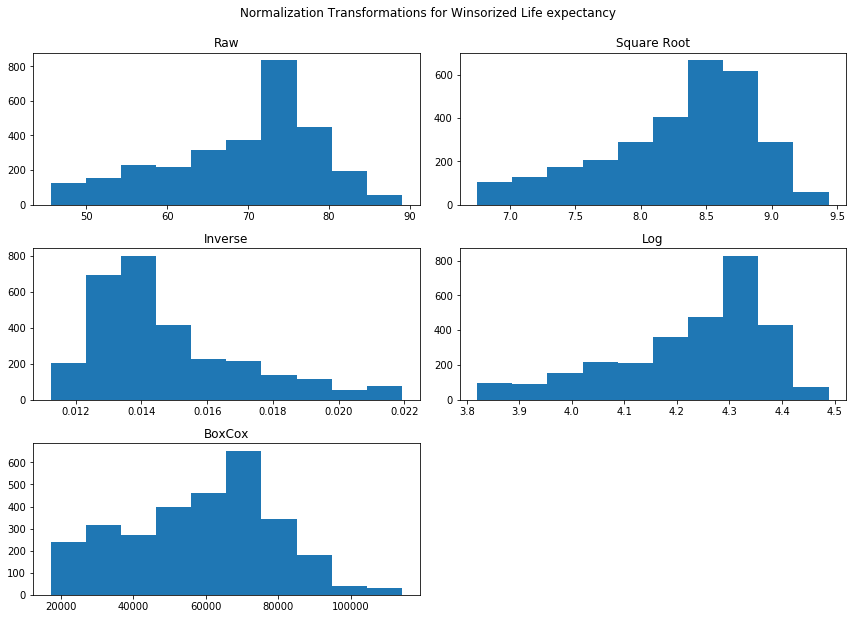

Raw - Winsorized Life expectancy:
Jarque-Bera test statistic: 196.831506;    p value: 0.0
Normality test statistic:    175.503781;    p value: 7.759578919258996e-39


Square Root - Winsorized Life expectancy:
Jarque-Bera test statistic:   281.537899;    p value: 0.0
Normality test statistic:     226.957514;    p value: 5.209571259880117e-50


Inverse - Winsorized Life expectancy:
Jarque-Bera test statistic:  797.265197;    p value: 0.0
Normality test statistic:     503.932087;    p value: 3.737126297789338e-110


Log - Winsorized Life expectancy:
Jarque-Bera test statistic:  399.735838;    p value: 0.0
Normality test statistic:     300.58244;    p value: 5.362316671581531e-66


BoxCox - Winsorized Life expectancy:
Jarque-Bera test statistic:  43.560506;    p value: 3.47501249997606e-10
Normality test statistic:     81.01489;    p value: 2.5576444078624314e-18




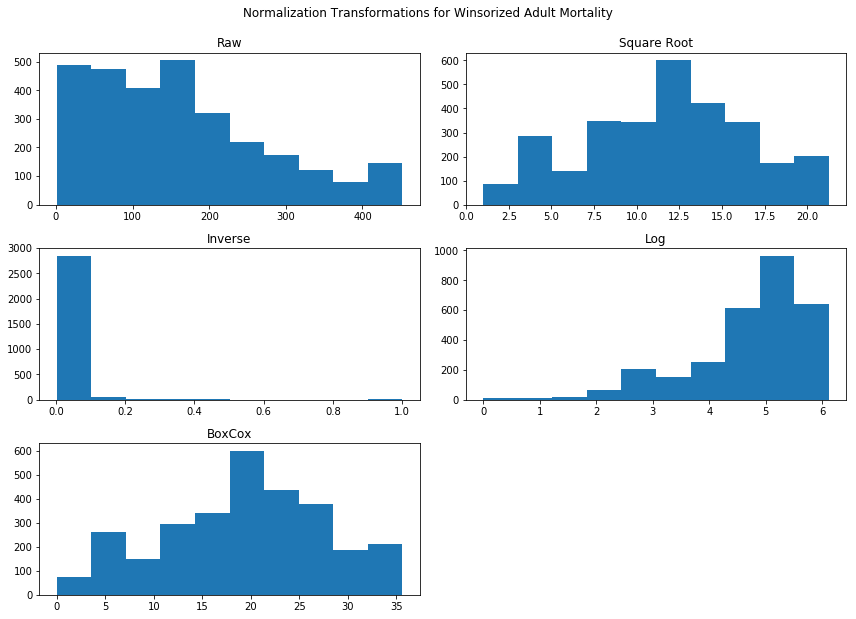

Raw - Winsorized Adult Mortality:
Jarque-Bera test statistic: 280.745276;    p value: 0.0
Normality test statistic:    225.892784;    p value: 8.87166439824976e-50


Square Root - Winsorized Adult Mortality:
Jarque-Bera test statistic:   47.151823;    p value: 5.769151822931917e-11
Normality test statistic:     98.184676;    p value: 4.780447752685929e-22


Inverse - Winsorized Adult Mortality:
Jarque-Bera test statistic:  2041752.896573;    p value: 0.0
Normality test statistic:     4703.402523;    p value: 0.0


Log - Winsorized Adult Mortality:
Jarque-Bera test statistic:  1275.249056;    p value: 0.0
Normality test statistic:     646.270495;    p value: 4.6147177483736325e-141


BoxCox - Winsorized Adult Mortality:
Jarque-Bera test statistic:  50.181386;    p value: 1.2683853967132563e-11
Normality test statistic:     95.402754;    p value: 1.9211233491785736e-21




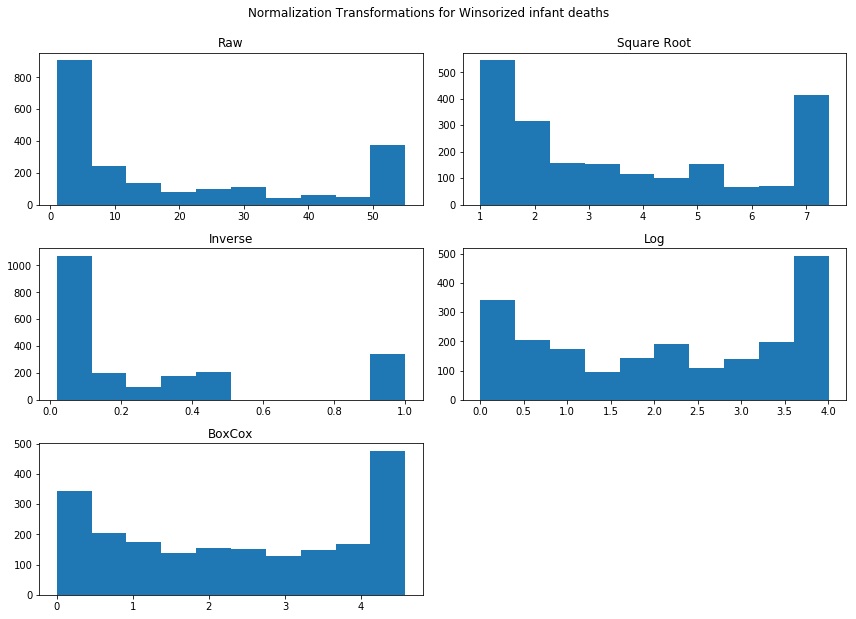

Raw - Winsorized infant deaths:
Jarque-Bera test statistic: 307.28034;    p value: 0.0
Normality test statistic:    487.62244;    p value: 1.3005661853181343e-106


Square Root - Winsorized infant deaths:
Jarque-Bera test statistic:   217.549142;    p value: 0.0
Normality test statistic:     9652.097624;    p value: 0.0


Inverse - Winsorized infant deaths:
Jarque-Bera test statistic:  529.188419;    p value: 0.0
Normality test statistic:     338.026596;    p value: 3.9669548281723425e-74


Log - Winsorized infant deaths:
Jarque-Bera test statistic:  176.327174;    p value: 0.0
Normality test statistic:     22743.747239;    p value: 0.0


BoxCox - Winsorized infant deaths:
Jarque-Bera test statistic:  177.765323;    p value: 0.0
Normality test statistic:     18683.815711;    p value: 0.0




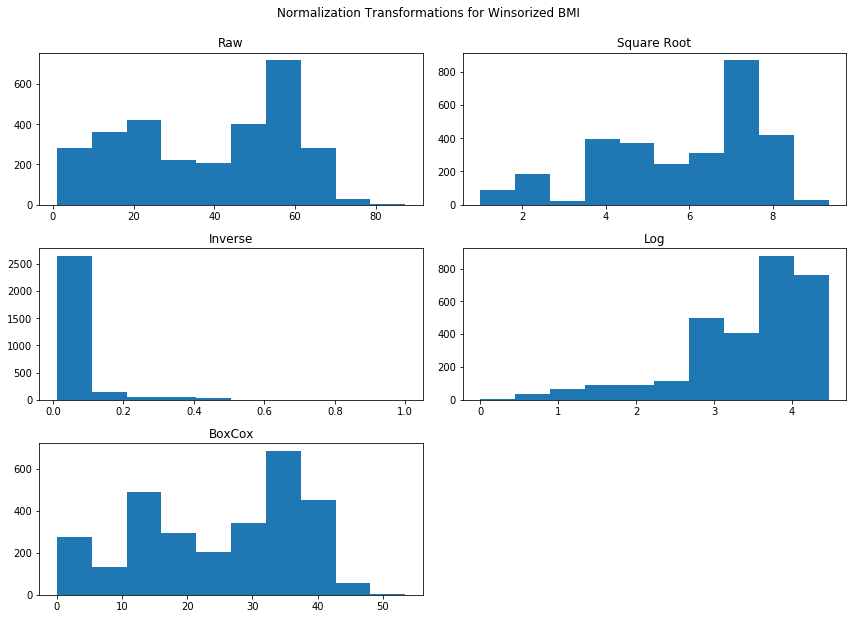

Raw - Winsorized BMI:
Jarque-Bera test statistic: 224.883804;    p value: 0.0
Normality test statistic:    6150.832545;    p value: 0.0


Square Root - Winsorized BMI:
Jarque-Bera test statistic:   262.307456;    p value: 0.0
Normality test statistic:     291.358876;    p value: 5.397889457213031e-64


Inverse - Winsorized BMI:
Jarque-Bera test statistic:  67829.094256;    p value: 0.0
Normality test statistic:     2536.756307;    p value: 0.0


Log - Winsorized BMI:
Jarque-Bera test statistic:  1272.162635;    p value: 0.0
Normality test statistic:     672.451593;    p value: 9.527785384496492e-147


BoxCox - Winsorized BMI:
Jarque-Bera test statistic:  223.419192;    p value: 0.0
Normality test statistic:     2221.569151;    p value: 0.0




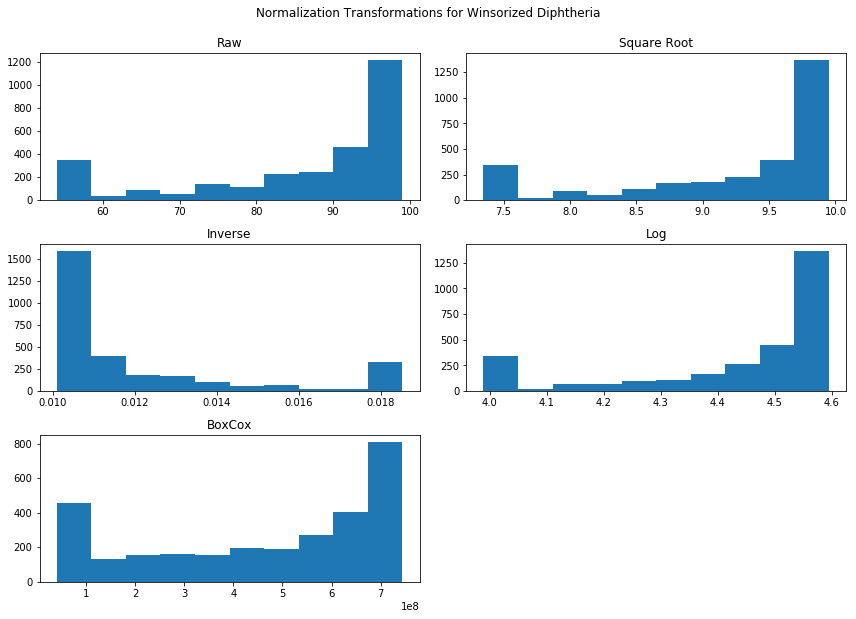

Raw - Winsorized Diphtheria:
Jarque-Bera test statistic: 630.985884;    p value: 0.0
Normality test statistic:    421.814531;    p value: 2.5359365594742927e-92


Square Root - Winsorized Diphtheria:
Jarque-Bera test statistic:   742.899249;    p value: 0.0
Normality test statistic:     474.686464;    p value: 8.378071527115455e-104


Inverse - Winsorized Diphtheria:
Jarque-Bera test statistic:  1213.992029;    p value: 0.0
Normality test statistic:     671.082454;    p value: 1.8892818282303086e-146


Log - Winsorized Diphtheria:
Jarque-Bera test statistic:  877.596647;    p value: 0.0
Normality test statistic:     536.616106;    p value: 2.9873980495688857e-117


BoxCox - Winsorized Diphtheria:
Jarque-Bera test statistic:  298.032305;    p value: 0.0
Normality test statistic:     1978.199759;    p value: 0.0




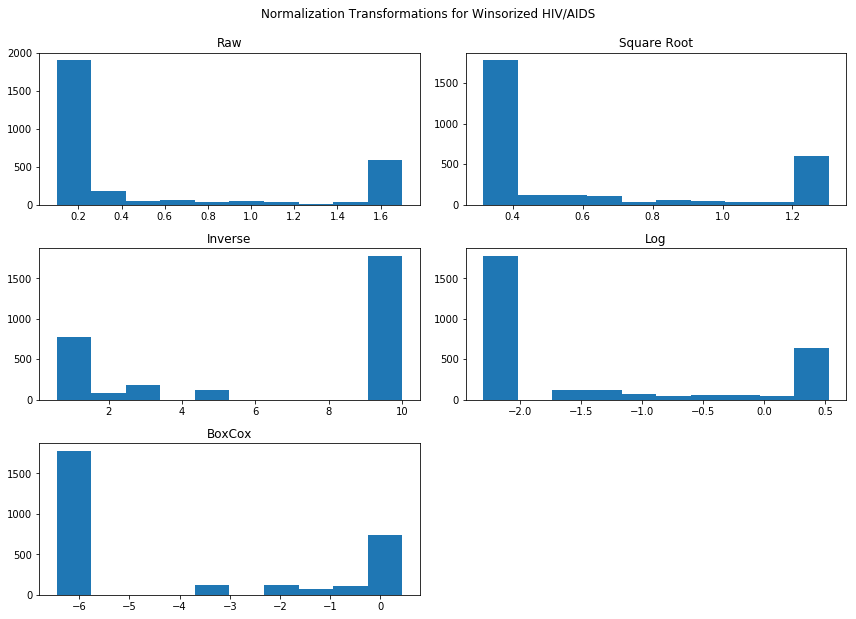

Raw - Winsorized HIV/AIDS:
Jarque-Bera test statistic: 698.306506;    p value: 0.0
Normality test statistic:    484.617301;    p value: 5.843729896870411e-106


Square Root - Winsorized HIV/AIDS:
Jarque-Bera test statistic:   580.947287;    p value: 0.0
Normality test statistic:     551.310668;    p value: 1.924906419275934e-120


Inverse - Winsorized HIV/AIDS:
Jarque-Bera test statistic:  459.679227;    p value: 0.0
Normality test statistic:     15582.236722;    p value: 0.0


Log - Winsorized HIV/AIDS:
Jarque-Bera test statistic:  488.602528;    p value: 0.0
Normality test statistic:     1330.858322;    p value: 1.0180925246421144e-289


BoxCox - Winsorized HIV/AIDS:
Jarque-Bera test statistic:  455.288632;    p value: 0.0
Normality test statistic:     18310.837687;    p value: 0.0




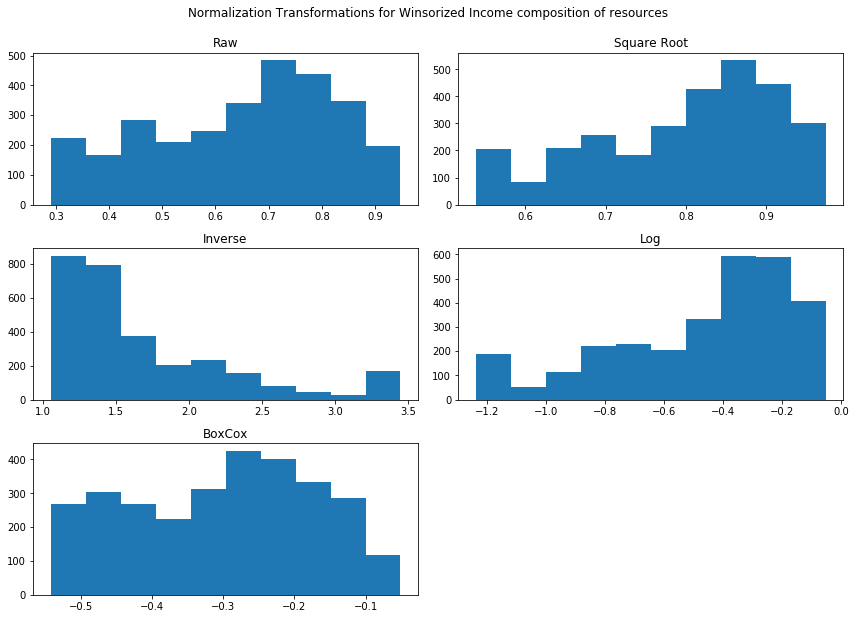

Raw - Winsorized Income composition of resources:
Jarque-Bera test statistic: 178.951522;    p value: 0.0
Normality test statistic:    369.783223;    p value: 5.041889062077171e-81


Square Root - Winsorized Income composition of resources:
Jarque-Bera test statistic:   253.766999;    p value: 0.0
Normality test statistic:     245.210531;    p value: 5.665127339349285e-54


Inverse - Winsorized Income composition of resources:
Jarque-Bera test statistic:  1333.874447;    p value: 0.0
Normality test statistic:     700.556703;    p value: 7.517003583545011e-153


Log - Winsorized Income composition of resources:
Jarque-Bera test statistic:  418.289882;    p value: 0.0
Normality test statistic:     310.336578;    p value: 4.0857180606413896e-68


BoxCox - Winsorized Income composition of resources:
Jarque-Bera test statistic:  145.147532;    p value: 0.0
Normality test statistic:     748.23703;    p value: 3.329609173945124e-163




In [655]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

for col in fin_exp.columns.drop('Status'):
    fig = plt.figure(figsize=(12,9))

    fig.add_subplot(321)
    raw = fin_exp[col][fin_exp[col]>0]    #All transformations have issues if any values are <=0
    plt.hist(raw)
    plt.title('Raw')

    fig.add_subplot(322)
    sq = np.sqrt(fin_exp[col][fin_exp[col]>0])
    plt.hist(sq)
    plt.title('Square Root')

    fig.add_subplot(323)
    inv = 1/(fin_exp[col][fin_exp[col]>0])
    plt.hist(inv)
    plt.title('Inverse')

    fig.add_subplot(324)
    lg = np.log(fin_exp[col][fin_exp[col]>0])
    plt.hist(lg)
    plt.title('Log')

    fig.add_subplot(325)
    boxcox1,_ = boxcox(fin_exp[col][fin_exp[col]>0])  
    plt.hist(boxcox1)
    plt.title('BoxCox')

    plt.suptitle('Normalization Transformations for ' + col)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


    #Jarque-Bera and Normality tests
    jb_stats = jarque_bera(raw)
    norm_stats = normaltest(raw)

    print("Raw - " + col + ":")
    print("Jarque-Bera test statistic: {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
    print("Normality test statistic:    {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

    print('\n')

    jb_stats = jarque_bera(sq)
    norm_stats = normaltest(sq)

    print("Square Root - " + col + ":")
    print("Jarque-Bera test statistic:   {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
    print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

    print('\n')

    jb_stats = jarque_bera(inv)
    norm_stats = normaltest(inv)

    print("Inverse - " + col + ":")
    print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
    print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

    print('\n')

    jb_stats = jarque_bera(lg)
    norm_stats = normaltest(lg)

    print("Log - " + col + ":")
    print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
    print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

    print('\n')

    jb_stats = jarque_bera(boxcox1)
    norm_stats = normaltest(boxcox1)

    print("BoxCox - " + col + ":")
    print("Jarque-Bera test statistic:  {0};    p value: {1}".format(round(jb_stats[0],6), jb_stats[1]))
    print("Normality test statistic:     {0};    p value: {1}".format(round(norm_stats[0],6), norm_stats[1]))

    print('\n')

As you can see, between the histograms and the Jarque-Bera and Normality tests, none of the features in this dataset can be normalized successfully (at least not via square root, inverse, log, or Box-Cox transformations), because none of them are originally close to normally distributed. This means we would have to choose a type of machine learning model that doesn't require the data to be normally distributed. Depending on what model we use, we may also have to standardize the range of data for each variable so that they match (for example, turn a range of \[0, 1000\] or \[0, 100\] into a range of \[0, 1\]).

### Conclusions:
Based on all of the exploration done throughout this challenge, I would conclude that the only variables that should definitely be preserved when entering the modeling phase are 'Life exectancy',  'Adult Mortality', 'infant deaths', 'BMI', 'Diphtheria', 'HIV/AIDS', and 'Income composition of resources'. However, special attention should be paid to 'Life expectancy', 'HIV/AIDS', 'Adult Mortality', and 'Income composition of resources'. All of these results make sense, as each of those variables contain data that one might expect to affect the length of the average populations' lifespan.